In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 16.7 MB/s eta 0:00:00


In [2]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install firebase
!pip install firebase-admin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import math
import requests
import pandas as pd
from transformers import pipeline


In [5]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Global Variables

In [6]:
TotalMovies = 35


FinalTitle = ''
FinalPoster = ''
FinalDescription = ''
FinalSummary = ''
FinalRating = 0.0


In [7]:
FinalTitleList = []
FinalPosterList = []
FinalDescriptionList = []
FinalSummaryList = []
FinalRatingList = []

## Loading DistillBART Summarizer

In [8]:
classifier = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [9]:
def BartSummary(review):

  if(len(review) > 4500):
    review = review[:4500]

  summaryVal = classifier(review)
  FinalSummary = summaryVal[0]['summary_text']

  FinalSummaryList.append(FinalSummary)
  
  print(FinalSummary)

## Sentiment Analyser

In [10]:
def SentimentAnalyser(Summarised_Review,rating,votes):
  sent = SentimentIntensityAnalyzer()

  x = sent.polarity_scores(Summarised_Review)['compound']

  NormScore = (x + 1)/2
  NormScore = NormScore * 10


  if(NormScore > 9.2 or NormScore < 2):

    votesOrg = ''
    for x in votes:
      if x != ',':
        votesOrg = votesOrg + x
    
    newScore = float(rating)/int(votesOrg)
  
    votesStr = str(votesOrg)
    numZeros = len(votesOrg)



    for i in range(numZeros-1):
      newScore = newScore * 10

    print("User Score: ",newScore)
    print("Avg Score: ",(newScore + NormScore)/2 )

  print("Sentiment Score: ",NormScore)
  
  CustomRating(rating,votes)

## Custom Rating Scorer

In [11]:
def CustomRating(rating,votes):
  c = 10
  m = 3000
  v= ''

  for x in votes:
    if x != ',':
      v = v + x
  
  votesInt = int(v)
  ratingFloat = float(rating)


  WR = (votesInt / (votesInt + m)) * ratingFloat + (m / (votesInt + m)) * c

  print("Custom Rating: ",WR)
  FinalRating = round(WR,1)
  FinalRatingList.append(FinalRating)

## NLP Summarizer

In [12]:
def Summariser(Movie_review,rating,votes):
  TextCombined = ''

  for review in Movie_review:
      TextCombined = TextCombined + review

  #SentimentAnalyser(TextCombined,rating,votes)
  #print(TextCombined)
  # Tokenizing the text
  stopWords = set(stopwords.words("english"))
  words = word_tokenize(TextCombined)

  # Creating a frequency table to keep the
  # score of each word

  freqTable = dict()
  for word in words:
    word = word.lower()
    if word in stopWords:
      continue
    if word in freqTable:
      freqTable[word] += 1
    else:
      freqTable[word] = 1

  # Creating a dictionary to keep the score
  # of each sentence
  sentences = sent_tokenize(TextCombined)
  sentenceValue = dict()

  for sentence in sentences:
    for word, freq in freqTable.items():
      if word in sentence.lower():
        if sentence in sentenceValue:
          sentenceValue[sentence] += freq
        else:
          sentenceValue[sentence] = freq



  sumValues = 0
  for sentence in sentenceValue:
    sumValues += sentenceValue[sentence]

  # Average value of a sentence from the original text
  if(len(sentenceValue) > 0):
    average = int(sumValues / len(sentenceValue))


  

  # Storing sentences into our summary.
  summary = ''
  for sentence in sentences:
    if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.7 * average)):
      summary += " " + sentence
  #print(summary)

  Summarised_Review = summary

  CustomRating(rating,votes)
  BartSummary(Summarised_Review)

  
  #SentimentAnalyser(Summarised_Review,rating,votes)


## Web Scrapping

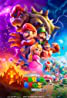

Custom Rating:  7.588442211055277
 The film delivers a fun and enjoyable experience for viewers by faithfully adapting every aspect of the game into the movie, including the Mario Kart and Donkey Kong franchises . The animation was insanely well done and i believe they could've made the movie a bit longer to expand on the world a bit more and get to know each character more .
Title:  The Super Mario Bros. Movie
Rating:  0.0
Description:  The story of The Super Mario Bros. on their journey through the Mushroom Kingdom.
Summary:  





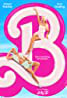

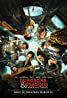

Custom Rating:  7.784511301317206
 "Dungeons & Dragons: Honor Among Thieves (2023) is a movie my wife and I watched in theatres this evening . I would score this an 8/10 and strongly recommend (my wife gave it a 9/10). The film is not the most original vision, and truth be told is very much hybrids of fantasy movies of the past . It blends so many things together that the cliché story really feels a tad fresh and just fun to enjoy and see what they pulled from archives of this world .
Title:  Dungeons & Dragons: Honor Among Thieves
Rating:  0.0
Description:  A charming thief and a band of unlikely adventurers embark on an epic quest to retrieve a lost relic, but things go dangerously awry when they run afoul of the wrong people.
Summary:  





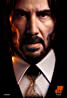

Custom Rating:  8.34645527996138
 It's everything a John Wick fan could want and, because these films are so technically proficient, you never feel like you're missing any of the action . Possibly the most creative choice is my favorite scene, one that combines a visually fantastic weapon with a shot choice that is unusual for action films of this nature . The shotgun fight in Paris with the "dragons breath" is the best action sequence .
Title:  John Wick: Chapter 4
Rating:  0.0
Description:  John Wick uncovers a path to defeating The High Table. But before he can earn his freedom, Wick must face off against a new enemy with powerful alliances across the globe and forces that turn old friends into foes.
Summary:  





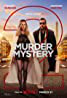

Custom Rating:  5.9832418778852015
 This is the typical movie that snobby film critics will never understand when a new sequel is inevitably announced . It's an improvement over the first movie in every way: the humour works much better, everything seems much bigger in scale and the Sandler-Aniston duo has greater chemistry . However the movie is a little short leading to a story that isn't as good as in Knives Out .
Title:  Murder Mystery 2
Rating:  0.0
Description:  Full-time detectives Nick and Audrey are struggling to get their private eye agency off the ground. They find themselves at the center of international abduction when their friend Maharaja, is kidnapped at his own lavish wedding.
Summary:  





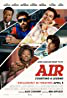

Custom Rating:  8.278850758180367
 Matt Damon is doing what he does best, a hero that is not flawless, more realistic, and constantly knows he is a humanbeing . The movie is up there with argo loved it and enjoy it. It's really well paced Viola Davis is iconic always delivering one of real life characters .
Title:  Air
Rating:  0.0
Description:  Follows the history of shoe salesman Sonny Vaccaro, and how he led Nike in its pursuit of the greatest athlete in the history of basketball, Michael Jordan.
Summary:  





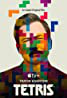

Custom Rating:  7.694773440157212
 This is a well acted, well set and very well acclamatized and extremely authenticly made production . The cast makes this story very fun to follow, even for me the grumpy old man that grew up a generation before all this happened, when the electric typewriter and electronic greenglowing calculator was the top of the hype .
Title:  Tetris
Rating:  0.0
Description:  The story of how one of the world's most popular video games found its way to players around the globe. Businessman Henk Rogers and Tetris inventor Alexey Pajitnov join forces in the USSR, risking it all to bring Tetris to the masses.
Summary:  





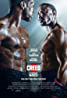

Custom Rating:  7.192517487005069
 Main issue is the bland lead, no charisma, presence or chemistry with anyone, he has nothing memorable about him . The performances of this movie is what saves it from being a complete flop . We're aware Adonis will have to square off to Damian, and we all know how it's going to end and there's gonna be a training montage a lot of smack talking .
Title:  Creed III
Rating:  0.0
Description:  Adonis has been thriving in both his career and family life, but when a childhood friend and former boxing prodigy resurfaces, the face-off is more than just a fight.
Summary:  





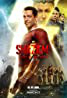

Custom Rating:  6.454191937210132
 The only way this movie earned a 6.6 rating is if parents let their children write the reviews . The movie kicks up the action scenes and special effects but the storyline lacks the heart and charm of the first film . I wanted to like more but a rare occasion for me I didn't like a lot of it and I'm sure financially it'll not do to well like other DC films .
Title:  Shazam! Fury of the Gods
Rating:  0.0
Description:  The film continues the story of teenage Billy Batson who, upon reciting the magic word "SHAZAM!" is transformed into his adult Super Hero alter ego, Shazam.
Summary:  





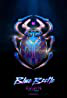

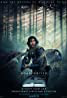

Custom Rating:  5.976795931341385
 The suspense and fear is better than Jurassic Park . The plot is extremely basic and predictable . The main character is supposed to be a trained Hyper-Space pilot with multiple missions under his belt, but he leaves the girl alone immediately after finding her so she can wonder off by herself when she wakes up .
Title:  65
Rating:  0.0
Description:  An astronaut crash lands on a mysterious planet only to discover he's not alone.
Summary:  





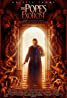

Custom Rating:  8.239881160433415
 Russell Crowe is good in this & with a great runtime, & not bad pacing, this is one supernatural flick you won't want to miss! The films runtime isn't bad at 97 minutes (1 hour & 37 minute), along with it's pacing which is a little slow in areas, but not bad . The actors were introduced very well and followed a good storytelling .
Title:  The Pope's Exorcist
Rating:  0.0
Description:  Follow Gabriele Amorth, the Vatican's leading exorcist, as he investigates the possession of a child and uncovers a conspiracy the Vatican has tried to keep secret.
Summary:  





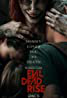

Your max_length is set to 142, but you input_length is only 3. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)


Custom Rating:  9.447199243677618
 CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery . Please submit your best shots of our featured destinations for next week . Visit CNN iReport.com/Travel next Wednesday for a new gallery of snapshots . Visit www.dailyimpact.com for a gallery next week for snapshots .
Title:  Evil Dead Rise
Rating:  0.0
Description:  A twisted tale of two estranged sisters whose reunion is cut short by the rise of flesh-possessing demons, thrusting them into a primal battle for survival as they face the most nightmarish version of family imaginable.
Summary:  





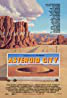

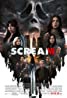

Custom Rating:  7.298788986633154
 The movie is a meme of itself, there is no chemistry between the cast . The New York setting was cool for a change and certainly gave a different vibe to all the other 'Scream' movies . The chase scenes were perfect and could be the best of the series, except maybe for Gale in Scream 2 .
Title:  Scream VI
Rating:  0.0
Description:  In the next installment, the survivors of the Ghostface killings leave Woodsboro behind and start a fresh chapter in New York City.
Summary:  





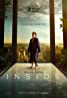

Custom Rating:  7.282171530521218
 The film is not for everyone, as it can be slow-paced, repetitive and bleak at times, but it is a unique and daring experiment that showcases Dafoe's talent and charisma . The internet loves to poke fun at DaFoe's crazy eyes and wild performances, and Inside shows just how good he is with these types of roles .
Title:  Inside
Rating:  0.0
Description:  Nemo, a high-end art thief, is trapped in a New York penthouse after his heist doesn't go as planned. Locked inside with nothing but priceless works of art, he must use all his cunning and ingenuity to survive.
Summary:  





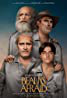

Your max_length is set to 142, but you input_length is only 3. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)


Custom Rating:  9.865091700341933
 CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery . Please submit your best shots of our featured destinations for next week . Visit CNN iReport.com/Travel next Wednesday for a new gallery of snapshots . Visit www.dailyimpact.com for a gallery next week for snapshots .
Title:  Beau Is Afraid
Rating:  0.0
Description:  Following the sudden death of his mother, a mild-mannered but anxiety-ridden man confronts his darkest fears as he embarks on an epic, Kafkaesque odyssey back home.
Summary:  





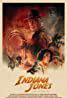

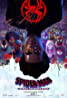

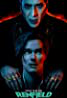

Custom Rating:  9.601908065915003


Your max_length is set to 142, but you input_length is only 117. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)


 The Unbearable weight of massive Talent was great comeback, i just hope he continues his form on the highest level . Nick Cage is just phenomenal, born to do his job doesn't matter the environment or position where he is . Renfield is worth to watch if you're here for Nick Cage .
Title:  Renfield
Rating:  0.0
Description:  Renfield, Dracula's henchman and inmate at the lunatic asylum for decades, longs for a life away from the Count, his various demands, and all of the bloodshed that comes with them.
Summary:  





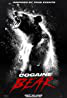

Custom Rating:  6.225043602197926
 Not quite the riotous spectacle I was hoping for . Ray Liotta's final ever role in the film . Not enough consistently funny jokes or moments to be a true comedy . The cast is surprisingly strong, with the main cast of 'The Americans' present - Russell, Rhys & Martindale - along with Ehrenreich .
Title:  Cocaine Bear
Rating:  0.0
Description:  An oddball group of cops, criminals, tourists and teens converge on a Georgia forest where a huge black bear goes on a murderous rampage after unintentionally ingesting cocaine.
Summary:  





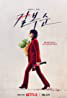

Custom Rating:  7.913248358439551
 Fight choreography and effects are top notch, it has a fast pace and good balance of the bizarre combination of the female lead family plot versus her second life as a paid assassin . It has some very dark humor I didn't expect and I loved the acting, I only watched her before in Crash Course in Romance and she is just great .
Title:  Kill Boksoon
Rating:  0.0
Description:  A single mother who is a renowned hired killer finds it difficult to achieve a balance between her personal and work life.
Summary:  





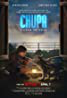

Custom Rating:  8.109028701767723
 Every aspect of the film is thoughtfully crafted, making it an enjoyable watch for all ages . The movie follows the adventures of Alex (Evan Whitten), a young boy who discovers a mysterious creature known as the chupacabra, AKA Chupa, when visiting his family in Mexico .
Title:  Chupa
Rating:  0.0
Description:  While visiting family in Mexico, teenage Alex gains an unlikely companion when he discovers a young chupacabra hiding in his grandpa's shed. To save the mythical creature, Alex and his cousins must embark on the adventure of a lifetime.
Summary:  





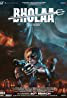

Custom Rating:  8.249669756341234
 Bholaa (2023) is a remake of a famous south movie 'Kaithi', it does look similar but alot of the things have been added and changed . The film stars all talented actors like Ajay Devgn, Tabu, Sanjay Mishra, Gajraj Rao, Kiran Kiran Kumar and Amala Paul .
Title:  Bholaa
Rating:  0.0
Description:  After getting out of prison with the desire to meet his daughter, Bholaa's plans are interrupted by a well-orchestrated drug bust.
Summary:  





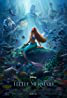

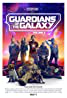

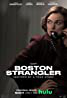

Custom Rating:  7.011546331482023
 Keira Knightley is impressive as the determined Loretta who is trying to balance her home life with her career . Carrie Coon plays the more worldly Jean who Loretta resents as this is her story . The film is not a remake of any of the previous movie or television adaptations about the horrific murders of at least 11 women from the Boston area between 1962 and 1964 .
Title:  Boston Strangler
Rating:  0.0
Description:  Loretta McLaughlin was the reporter who first connected the murders and broke the story of the Boston Strangler. She and Jean Cole challenged the sexism of the early 1960s to report on the city's most notorious serial killer.
Summary:  





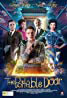

Custom Rating:  8.635624862727871
 The Portable Door is a screen adaptation of the first book in Tom Holt's J. W. Wells & Co. series . The plot has something to do with a mysterious London firm and it's bizarre CEO . The CEO Christof Waltz and Office Manager Dennis played by Sam Neil who is also an ugly goblin are disrupting the world of magic .
Title:  The Portable Door
Rating:  0.0
Description:  Paul Carpenter is an intern at a mysterious London firm with unconventional employers, including a CEO who wants to disrupt the ancient magical world with modern corporate practices.
Summary:  





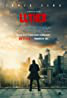

Custom Rating:  6.63181437678422
 The film suffers from a lack of originality and suspense, as it recycles many elements from previous seasons of the BBC series . It could have been great but it stank. I was excited to see this movie after having watched a couple of the series. I just spent the entire week watching every single episode of all 5 seasons of Luther .
Title:  Luther: The Fallen Sun
Rating:  0.0
Description:  Brilliant but disgraced detective John Luther breaks out of prison to hunt down a sadistic serial killer who is terrorising London.
Summary:  





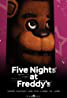

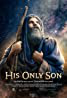

Custom Rating:  9.219502719502719
 This is the POWERFUL and difficult story of Abraham and Issac, beautifully done and perfectly tied to the ultimate sacrifice of God's Only Son for us that we recognize Easter . The film is so monumentally flawed in every other respect as to cause it to not even remotely function as a narrative feature .
Title:  His Only Son
Rating:  0.0
Description:  After being called on by the Lord, Abraham's faith is tested on his three day journey to sacrifice his son.
Summary:  





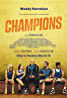

Custom Rating:  7.728571428571429
 Woody Harrelson on form as always and Kaitlin Olson playing a strong female role who's real life husband is a kind of Ted Lasso character by co-owning with Ryan Reynolds a minor league UK football ( soccer ) team . It's a human story of triumph over adversity but also a story of people realising what's in their soul and what really is success .
Title:  Champions
Rating:  0.0
Description:  A former minor-league basketball coach is ordered by the court to manage a team of players with intellectual disabilities. He soon realizes that despite his doubts, together, this team can go further than they ever imagined.
Summary:  





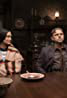

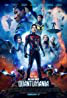

Custom Rating:  6.507092922942676
 "Ant-Man and the Wasp: Quantumania" just doesn't land in the same way as the previous films . I'm looking forward to seeing more of Kang in future MCU projects . I think he has the potential to be as threatening as Thanos was back in the Infinity Saga .
Title:  Ant-Man and the Wasp: Quantumania
Rating:  0.0
Description:  Scott Lang and Hope Van Dyne, along with Hank Pym and Janet Van Dyne, explore the Quantum Realm, where they interact with strange creatures and embark on an adventure that goes beyond the limits of what they thought was possible.
Summary:  





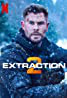

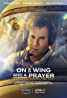

Custom Rating:  8.632391454169538
 On a Wing and a Prayer is based upon a true story that is amazing on its own, and really doesn't need any "help" or additions to the story to make it more interesting to viewers . Movie studios love placing kids in pointless roles in movies . Children overreacting and being dramatic in a true-life story like this isn't funny, comedic, or cute, it's just annoying .
Title:  On a Wing and a Prayer
Rating:  0.0
Description:  After their pilot dies unexpectedly mid-flight, Doug White's (Dennis Quaid) has to safely land a plane and save his entire family from insurmountable danger.
Summary:  





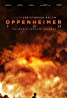

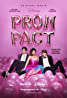

Custom Rating:  8.929708599857854
 Prom Pact is a tribute to (and a send up of) all those classic movies of the 1980s . The most fun is in all of the references to classic 80s pop culture . The soundtrack of featured music is a playlist of hits of the era from start to finish .
Title:  Prom Pact
Rating:  0.0
Description:  Follows the main character, a feminist who doesn't believe in the idea of falling in love, especially in heteronormative love, but then she falls and there's undeniable chemistry.
Summary:  





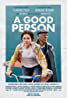

Custom Rating:  8.94126984126984
 A Good Person tells a story of addiction recovery that has certainly been done many times before, but rarely do we ever see it done with this much tact, wit, and genuine power . Florence Pugh and Morgan Freeman both arguably give some of their finest performances here, with Pugh bleeding raw grief and Freeman sporting visible scars of grief so convincingly .
Title:  A Good Person
Rating:  0.0
Description:  Follows Allison, whose life falls apart following her involvement in a fatal accident.
Summary:  





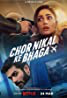

Custom Rating:  8.054328548331783
 Yami Gautam Dhar once again delivered a compelling performance (following A Thursday; which I happened to love and admire) The sudden slew of twists and turns are quite interesting and make the overall experience more rewarding, provided you're not a seasoned spectator, because hardened buffs like us can see that sudden change of course coming from a mile away .
Title:  Chor Nikal Ke Bhaga
Rating:  0.0
Description:  A flight attendant and her business partner on a mission to steal diamonds and free themselves from the clutches of a loan shark.At 40,000 feet in the air, the heist goes horribly wrong and turns into a hostage situation.
Summary:  





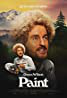

Custom Rating:  9.659652333028362
 Writer-director Brit McAdams uses Bob Ross as inspiration for his first feature film . Owen Wilson's portrayal of Carl Nargle is part tribute and part caricature . The comedy never really lands for a few reasons, but mostly because we don't much care for Carl . There is simply no joy in this painting .
Title:  Paint
Rating:  0.0
Description:  Carl Nargle, Vermont's #1 public television painter, is convinced he has it all: a signature perm, custom van, and fans hanging on his every stroke - until a younger, better artist steals everything (and everyone) Carl loves.
Summary:  





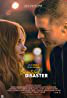

Your max_length is set to 142, but you input_length is only 3. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=1)


Custom Rating:  9.621072088724583
 CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery . Please submit your best shots of our featured destinations for next week . Visit CNN iReport.com/Travel next Wednesday for a new gallery of snapshots . Visit www.dailyimpact.com for a gallery next week for snapshots .
Title:  Beautiful Disaster
Rating:  0.0
Description:  College freshman, Abby, tries to distance herself from her dark past while resisting her attraction to bad boy, Travis.
Summary:  





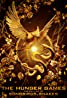

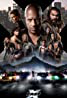

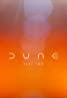

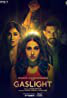

Custom Rating:  8.165129197878967
 Pavan Kirpalani brings a unit of Sara Ali Khan, Chitrangda Singh, Vikrant Massey, Rahul Dev, and Akshay Oberoi for his mystery thriller, "Gaslight" It's a decent movie but very dark. It starts strong but loses grip in between and then if you are still watching it it's only to wish it ends faster .
Title:  Gaslight
Rating:  0.0
Description:  Misha, who returns to her royal family estate after 15 years to visit her estranged father, only to find him missing.
Summary:  





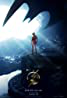

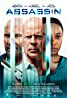

Custom Rating:  9.142031523642732
 There are lots of B-movie actors starring, that aint terrible, but completely lacking in charisma . The movie plot is too stupid to believe and is just about as exciting as watching a piece of cardboard box flapping around in the wind . I have lost so much respect for both of the actors!
Title:  Assassin
Rating:  0.0
Description:  A man dies as part of an experimental military program. A former black-ops soldier takes his place to find who killed him.
Summary:  





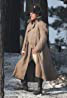

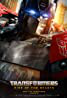

In [14]:
FinalTitleList = []
FinalPosterList = []
FinalDescriptionList = []
FinalSummaryList = []
FinalRatingList = []
FinalReleaseDateList = []
FinalPopularityList = []


#headers = {'Accept-Language': 'en-US,en;q=0.8'}

base_url = "https://www.imdb.com"
url = f"{base_url}/search/title/?title_type=feature&year=2023-02-01,2023-12-31"
page_num = 1

count = 0

while True:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    movie_containers = soup.find_all('div', class_='lister-item mode-advanced')

    for movie in movie_containers:
        title = movie.h3.a.text
        rating = movie.strong.text.strip() if movie.strong else 'N/A'
        metascore = movie.find('span', class_='metascore').text.strip() if movie.find('span', class_='metascore') else 'N/A'
        votes = movie.find('span', attrs={'name': 'nv'}).text.strip() if movie.find('span', attrs={'name': 'nv'}) else 'N/A'
        poster_url = movie.find('img', class_='loadlate')['loadlate'] if movie.find('img', class_='loadlate') else 'N/A'
        movie_url = f"{base_url}{movie.find('a')['href']}"
        movie_response = requests.get(movie_url)
        movie_soup = BeautifulSoup(movie_response.content, 'html.parser')
        #print(f"{title} Summarised Review:\n")
        review_url = f"{movie_url}reviews?ref_=adv_li_tt"
        review_response = requests.get(review_url)
        review_soup = BeautifulSoup(review_response.content, 'html.parser')
        reviews = review_soup.select('.content .text.show-more__control')

        Movie_review = []

        for i, review in enumerate(reviews):
          if i == 10:
            break
          #print(review.text.strip() + '\n')
          review = review.text.strip()
          Movie_review.append(review)
          
        print("\n\n")
        # description_element = movie_soup.select_one('.text-muted').text.strip()
        # description=description_element.text.strip() if description_element else None
        description = movie.findAll('p', class_='text-muted')
        description_=description[1].text.strip() if movie.findAll('p', class_='text-muted') else 'N/A'
        if poster_url != 'N/A':
            response = requests.get(poster_url)
            img = Image.open(BytesIO(response.content))
            img.show()
        movie_url = f"{base_url}{movie.find('a')['href']}"
        # print (movie_url)
        movie_response = requests.get(movie_url)
        movie_soup = BeautifulSoup(movie_response.content, 'html.parser')

        #description = movie_soup.find('span', class_='summary_text').text.strip() if movie_soup.find('span', class_='summary_text') else 'N/A'
        # reviews = [review.text.strip() for review in movie_soup.find_all('div', class_='text')]
        #description_element = movie_soup.select_one('.fjlUgo')
        #description=description_element.text.strip() if description_element else None
        reviews = [review.text.strip() for review in movie_soup.select('.user_reviews .text.show-more__control')]

        
        

        #print(Movie_review)

        if rating != 'N/A'  or votes != 'N/A':
          #print(f"Title: {title}\nRating: {rating}\nMetascore: {metascore}\nVotes: {votes}\nPoster URL: {poster_url}\nDescription: {description_}\nReviews:\n{reviews}\n")
          
          FinalTitle = title
          FinalDescription = description_
          FinalPoster = poster_url

          Summariser(Movie_review,rating,votes)

          
          print("Title: ",FinalTitle)
          print("Rating: ",FinalRating)
          print("Description: ",FinalDescription)
          print("Summary: ", FinalSummary)
          
          FinalTitleList.append(FinalTitle)
          FinalDescriptionList.append(FinalDescription)

          count +=1

        

        if(count == TotalMovies):
            break
    
    break



    next_link = soup.find('a', text='Next »')
    if not next_link:
        break
    page_num += 1
    url = f"{base_url}{next_link['href']}"
    #print(f"Scraped page {page_num}: {url}")

## Fetching HD Poster using TMDB api

In [15]:

movieName = "Shazam! Fury of the Gods"
response = requests.get("https://api.themoviedb.org/3/search/movie?api_key=e8acd2eeedc05684e89803deafb1a9ff&query="+movieName)

responseJson = response.json()
print(responseJson['results'])

HDPosterPath = responseJson['results'][0]['poster_path']
print(HDPosterPath)

[{'adult': False, 'backdrop_path': '/wybmSmviUXxlBmX44gtpow5Y9TB.jpg', 'genre_ids': [28, 35, 14], 'id': 594767, 'original_language': 'en', 'original_title': 'Shazam! Fury of the Gods', 'overview': 'Billy Batson and his foster siblings, who transform into superheroes by saying "Shazam!", are forced to get back into action and fight the Daughters of Atlas, who they must stop from using a weapon that could destroy the world.', 'popularity': 4162.423, 'poster_path': '/A3ZbZsmsvNGdprRi2lKgGEeVLEH.jpg', 'release_date': '2023-03-15', 'title': 'Shazam! Fury of the Gods', 'video': False, 'vote_average': 6.975, 'vote_count': 688}]
/A3ZbZsmsvNGdprRi2lKgGEeVLEH.jpg


https://image.tmdb.org/t/p/w500/A3ZbZsmsvNGdprRi2lKgGEeVLEH.jpg


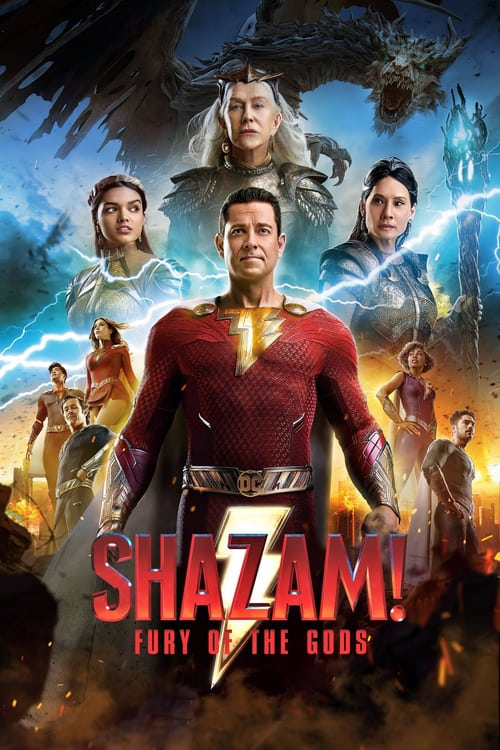

In [16]:
HDPoster = 'https://image.tmdb.org/t/p/w500'+HDPosterPath

print(HDPoster)

response = requests.get(HDPoster)
img = Image.open(BytesIO(response.content))
img.show()


In [17]:
print(len(FinalTitleList))

33


In [18]:

FinalPosterList = []
FinalReleaseDateList = []
FinalPopularityList = []


for i in range(len(FinalTitleList)):
  print(i)
  movieName = FinalTitleList[i]
  response = requests.get("https://api.themoviedb.org/3/search/movie?api_key=e8acd2eeedc05684e89803deafb1a9ff&query="+movieName)

  responseJson = response.json()
  print(responseJson['results'])

  HDPosterPath = responseJson['results'][0]['poster_path']
  Release_date = responseJson['results'][0]['release_date']
  Popularity = responseJson['results'][0]['popularity']
  Popularity = round(Popularity)


  print(HDPosterPath)
 
  HDPoster = 'https://image.tmdb.org/t/p/w500'+HDPosterPath

  
  FinalPosterList.append(HDPoster)

  FinalReleaseDateList.append(Release_date)
  FinalPopularityList.append(Popularity)

  # response = requests.get(HDPoster)
  # img = Image.open(BytesIO(response.content))
  # img.show()

  



0
[{'adult': False, 'backdrop_path': '/9n2tJBplPbgR2ca05hS5CKXwP2c.jpg', 'genre_ids': [16, 12, 10751, 14, 35], 'id': 502356, 'original_language': 'en', 'original_title': 'The Super Mario Bros. Movie', 'overview': 'While working underground to fix a water main, Brooklyn plumbers—and brothers—Mario and Luigi are transported down a mysterious pipe and wander into a magical new world. But when the brothers are separated, Mario embarks on an epic quest to find Luigi.', 'popularity': 9513.942, 'poster_path': '/qNBAXBIQlnOThrVvA6mA2B5ggV6.jpg', 'release_date': '2023-04-05', 'title': 'The Super Mario Bros. Movie', 'video': False, 'vote_average': 7.556, 'vote_count': 575}, {'adult': False, 'backdrop_path': '/1GGfWFp9hp4RUHRHxd505z9rVFa.jpg', 'genre_ids': [28, 12, 35, 10751, 878], 'id': 9607, 'original_language': 'en', 'original_title': 'Super Mario Bros.', 'overview': "Mario and Luigi, plumbers from Brooklyn, find themselves in an alternate universe where evolved dinosaurs live in hi-tech squal

## Printing all the details from List

In [ ]:


for i in range(len(FinalTitleList)):

  response = requests.get(FinalPosterList[i])
  img = Image.open(BytesIO(response.content))
  img.show()

  print(FinalTitleList[i])
  print(FinalDescriptionList[i])
  print(FinalRatingList[i])
  print(FinalSummaryList[i])
  print(FinalReleaseDateList[i])
  print(FinalPopularityList[i])

  


# Adding All Movies To Firebase Database

In [28]:

import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore




In [29]:
cred = credentials.Certificate("serviceAccountKey.json")
firebase_admin.initialize_app(cred)

In [30]:

#firebase_admin.initialize_app(cred)
 

db = firestore.client()

# Add document with auto ID
data = {'name':'Clark','age':30}
db.collection('persons').add(data)

# # Set document with custom ID

# data = {'name':'Clark','age':30}
# db.collection('persons').document('CustomDocID').set(data)

# Merging data into already existing doc
# db.collection('persons').document('CustomDocID').set({'address':'New York'},merge = True)

#Updating multiple collection
#db.collection('persons').document('MyDocumentName').collection('Movies').add({'name':'Spider-Man'})
#db.collection('ColabFiles').document('MyDocumentName').collection('Movies').document('No way home').set({'name':'Spider-Man - 3'})

(DatetimeWithNanoseconds(2023, 4, 12, 9, 35, 22, 825836, tzinfo=datetime.timezone.utc),
 <google.cloud.firestore_v1.document.DocumentReference at 0x7efae5ec4940>)

In [ ]:
for i in range(len(FinalTitleList)):


  data = {'Title': FinalTitleList[i],'Description':FinalDescriptionList[i],'Rating':FinalRatingList[i],'Summary':FinalSummaryList[i],'ReleaseDate':FinalReleaseDateList[i],'Poster': FinalPosterList[i],'Popularity':FinalPopularityList[i]}

  db.collection('Movies').add(data)

# Trending Movies

In [34]:

TrendingTitleList = FinalTitleList
TrendingDescriptionList = FinalDescriptionList
TrendingSummaryList = FinalSummaryList
TrendingReleaseDateList = FinalReleaseDateList
TrendingPopularityList = FinalPopularityList
TrendingRatingList = FinalRatingList
TrendingPosterList = FinalPosterList

#### Sorting according Popularity

In [35]:
for i in range(len(TrendingTitleList)-1):
  for j in range(i+1,len(TrendingTitleList)):
    if TrendingPopularityList[j] > TrendingPopularityList[i]:

      temp1 = TrendingTitleList[i]
      TrendingTitleList[i] = TrendingTitleList[j]
      TrendingTitleList[j] = temp1

      temp1 = TrendingDescriptionList[i]
      TrendingDescriptionList[i] = TrendingDescriptionList[j]
      TrendingDescriptionList[j] = temp1

      temp1 = TrendingSummaryList[i]
      TrendingSummaryList[i] = TrendingSummaryList[j]
      TrendingSummaryList[j] = temp1

      temp1 = TrendingReleaseDateList[i]
      TrendingReleaseDateList[i] = TrendingReleaseDateList[j]
      TrendingReleaseDateList[j] = temp1

      temp1 = TrendingPopularityList[i]
      TrendingPopularityList[i] = TrendingPopularityList[j]
      TrendingPopularityList[j] = temp1

      temp1 = TrendingRatingList[i]
      TrendingRatingList[i] = TrendingRatingList[j]
      TrendingRatingList[j] = temp1

      temp1 = TrendingPosterList[i]
      TrendingPosterList[i] = TrendingPosterList[j]
      TrendingPosterList[j] = temp1




## Add Trending Movies to Firebase database

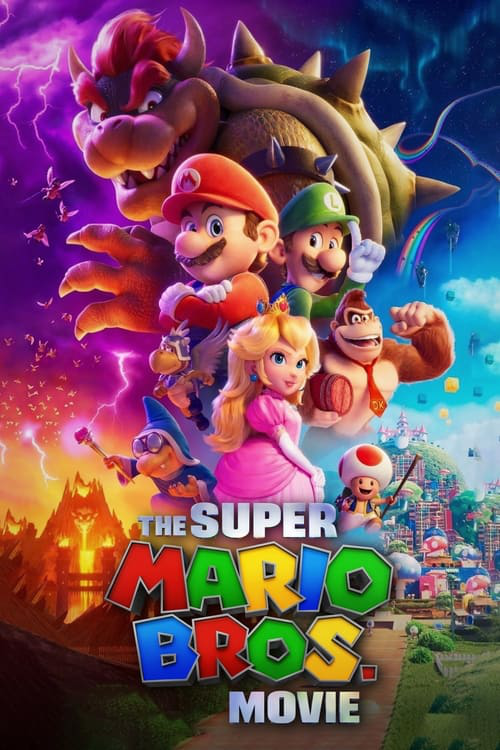

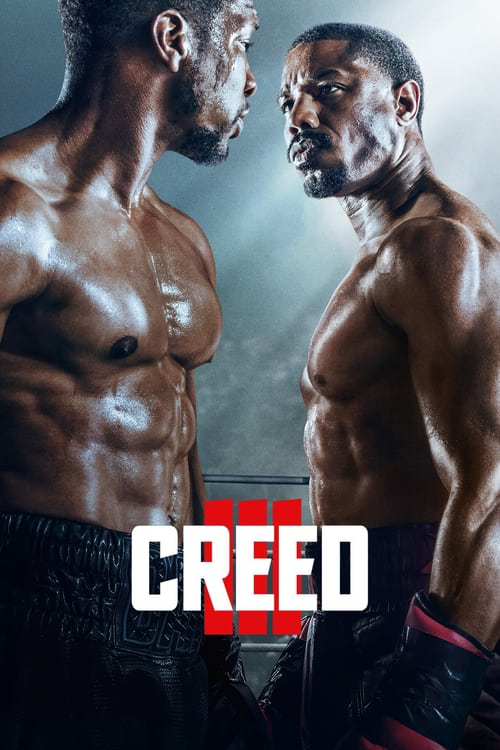

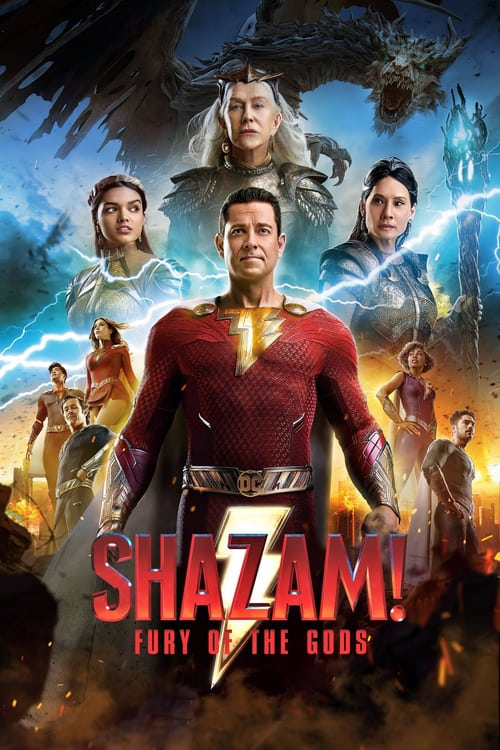

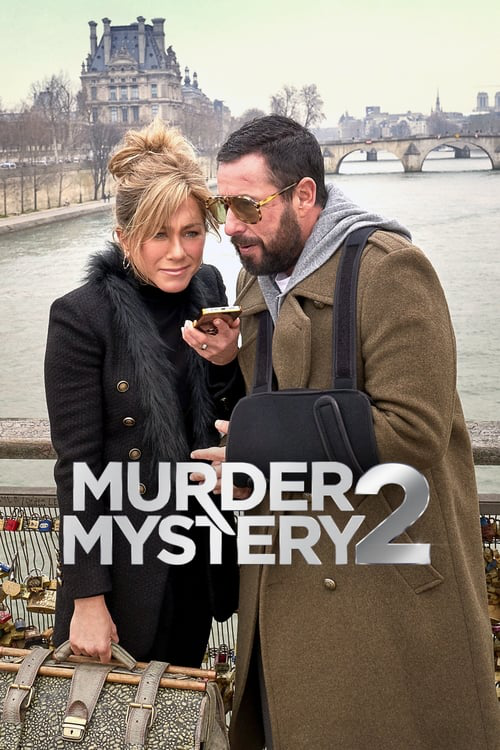

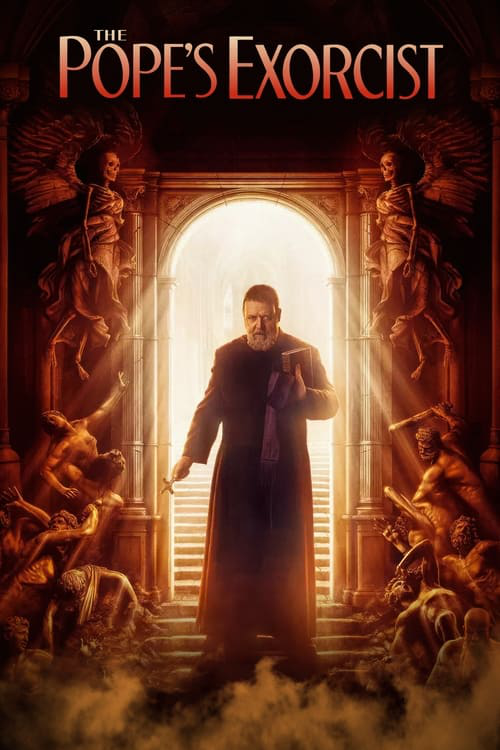

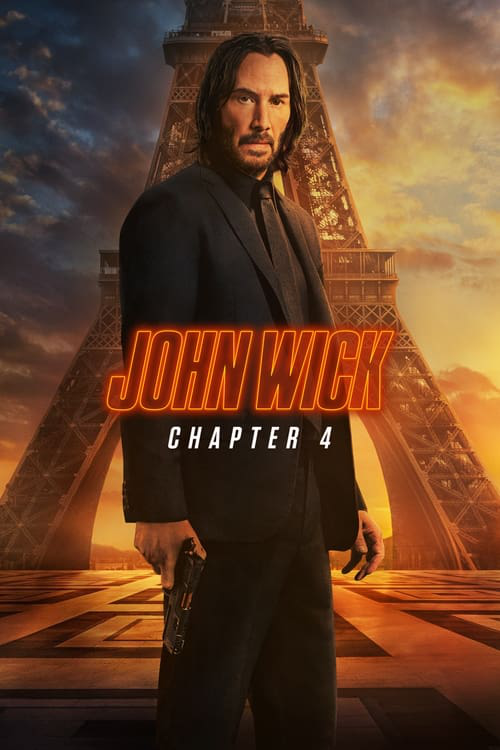

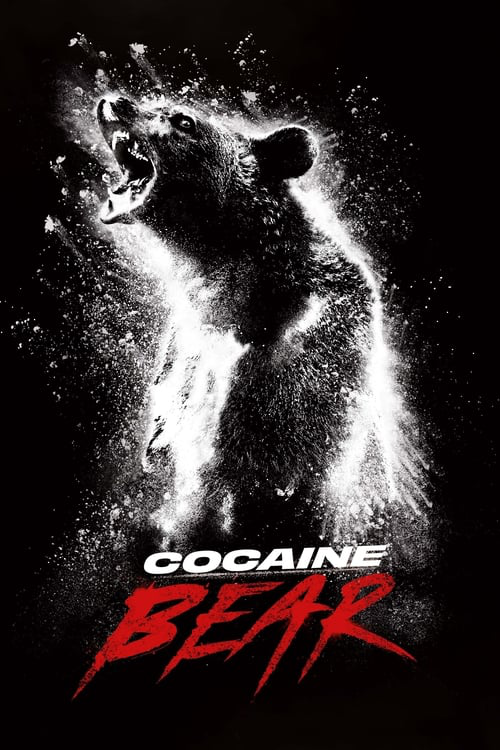

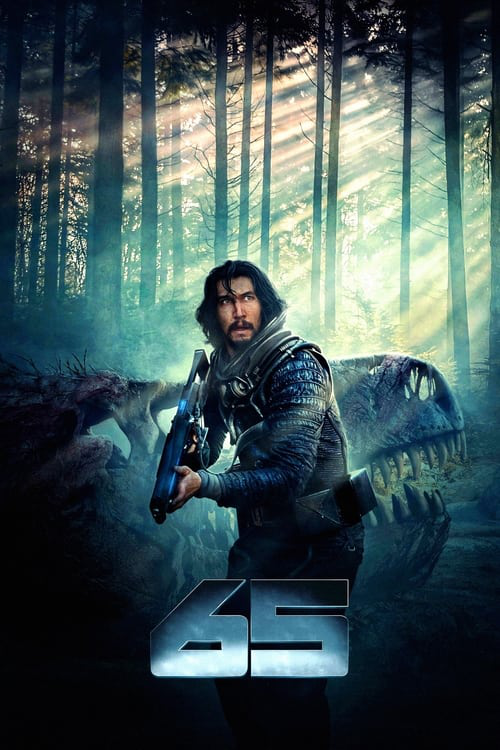

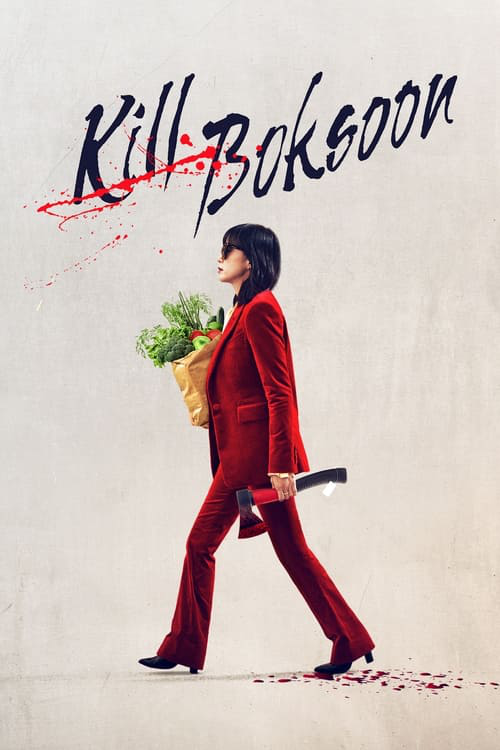

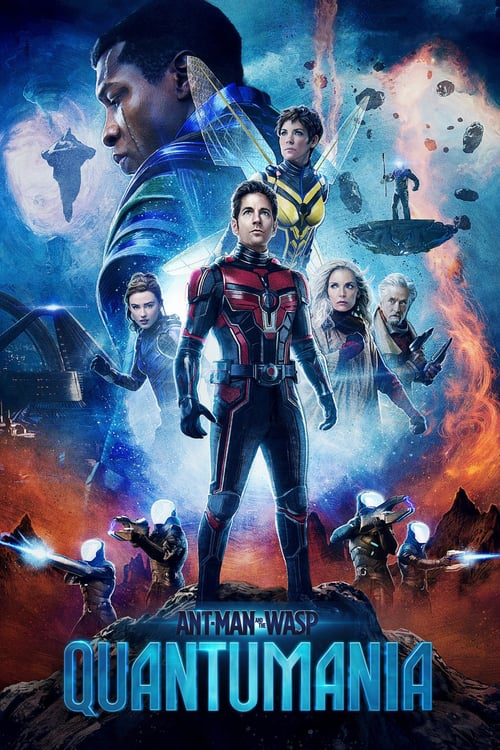

In [37]:
for i in range(10):


  response = requests.get(TrendingPosterList[i])
  img = Image.open(BytesIO(response.content))
  img.show()
  
  data = {'Title': TrendingTitleList[i],'Description':TrendingDescriptionList[i],'Rating':TrendingRatingList[i],'Summary':TrendingSummaryList[i],'ReleaseDate':TrendingReleaseDateList[i],'Poster': TrendingPosterList[i],'Popularity':TrendingPopularityList[i]}

  db.collection('Trending').add(data)

## Top Rated Movies

In [38]:
TopRatedTitleList = FinalTitleList
TopRatedDescriptionList = FinalDescriptionList
TopRatedSummaryList = FinalSummaryList
TopRatedReleaseDateList = FinalReleaseDateList
TopRatedPopularityList = FinalPopularityList
TopRatedRatingList = FinalRatingList
TopRatedPosterList = FinalPosterList

#### Sorting according rating

In [39]:
for i in range(len(TopRatedTitleList)-1):
  for j in range(i+1,len(TopRatedTitleList)):
    if TopRatedRatingList[j] > TopRatedRatingList[i]:

      temp1 = TopRatedTitleList[i]
      TopRatedTitleList[i] = TopRatedTitleList[j]
      TopRatedTitleList[j] = temp1

      temp1 = TopRatedDescriptionList[i]
      TopRatedDescriptionList[i] = TopRatedDescriptionList[j]
      TopRatedDescriptionList[j] = temp1

      temp1 = TopRatedSummaryList[i]
      TopRatedSummaryList[i] = TopRatedSummaryList[j]
      TopRatedSummaryList[j] = temp1

      temp1 = TopRatedReleaseDateList[i]
      TopRatedReleaseDateList[i] = TopRatedReleaseDateList[j]
      TopRatedReleaseDateList[j] = temp1

      temp1 = TopRatedPopularityList[i]
      TopRatedPopularityList[i] = TopRatedPopularityList[j]
      TopRatedPopularityList[j] = temp1

      temp1 = TopRatedRatingList[i]
      TopRatedRatingList[i] = TopRatedRatingList[j]
      TopRatedRatingList[j] = temp1

      temp1 = TopRatedPosterList[i]
      TopRatedPosterList[i] = TopRatedPosterList[j]
      TopRatedPosterList[j] = temp1

# Adding Top Rated to Firebase Database

In [40]:
#Top rated Movies
for i in range(15):


  data = {'Title': TopRatedTitleList[i],'Description':TopRatedDescriptionList[i],'Rating':TopRatedRatingList[i],'Summary':TopRatedSummaryList[i],'ReleaseDate':TopRatedReleaseDateList[i],'Poster': TopRatedPosterList[i],'Popularity':TopRatedPopularityList[i]}

  db.collection('TopRated').add(data)
